# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True
%matplotlib inline 

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
columns = ['Pregnancies','GlucosePlasma','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
pima = pd.read_csv("./pima-indians-diabetes.data", names=columns)
pima.head()

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Pregnancies -> Number of times pregnant
#### GlucosePlasma -> glucose concentration a 2 hours in an oral glucose tolerance test
#### BloodPressure -> Diastolic blood pressure (mm Hg)
#### SkinThickness -> Triceps skin fold thickness (mm)
#### Insulin -> 2-Hour serum insulin (mu U/ml)
#### BMI -> Body mass index (weight in kg/(height in m)^2)
#### DiabetesPedigreeFunction -> Diabetes pedigree function
#### Age -> Age (years)
#### Outcome -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
GlucosePlasma               768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
GlucosePlasma,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q2. Print 10 samples from the dataset

In [5]:
pima.tail(10)

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
pima.dtypes

Pregnancies                   int64
GlucosePlasma                 int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

- The pima dataset has interger and float as its datatypes

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

- Let us see how many 0 value is there in the each column except for the Class column, since its a classification columns 0 means that the particular observation didn't not have diabeties

In [7]:
for col in pima.columns:
    if col != 'Outcome':
        try:
            print(col +" has {} values as 0.".format((pima[col] == 0).value_counts()[True]))
        except:
            print(col +" has no values as 0.")

Pregnancies has 111 values as 0.
GlucosePlasma has 5 values as 0.
BloodPressure has 35 values as 0.
SkinThickness has 227 values as 0.
Insulin has 374 values as 0.
BMI has 11 values as 0.
DiabetesPedigreeFunction has no values as 0.
Age has no values as 0.


In [8]:
for feature in ['GlucosePlasma', 'BloodPressure', 'BMI', 'Insulin']:
    pima[feature] = pima[feature].replace(0, np.nan)
    pima[feature] = pima[feature].fillna((pima[feature].median()))

In [9]:
pima.head()

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29,125.0,26.6,0.351,31,0
2,8,183.0,64.0,0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [10]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
GlucosePlasma,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

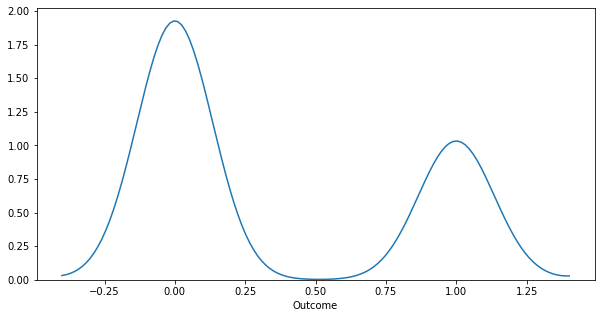

In [11]:
plt.figure(figsize=(10, 5))
sns.distplot(pima['Outcome'],hist=False)

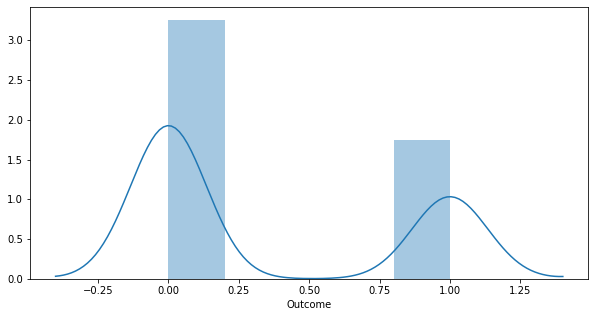

In [12]:
plt.figure(figsize=(10, 5))
sns.distplot(pima['Outcome'], kde=True);

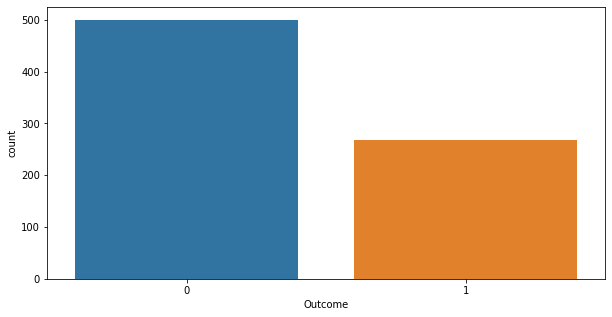

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(pima['Outcome']);

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

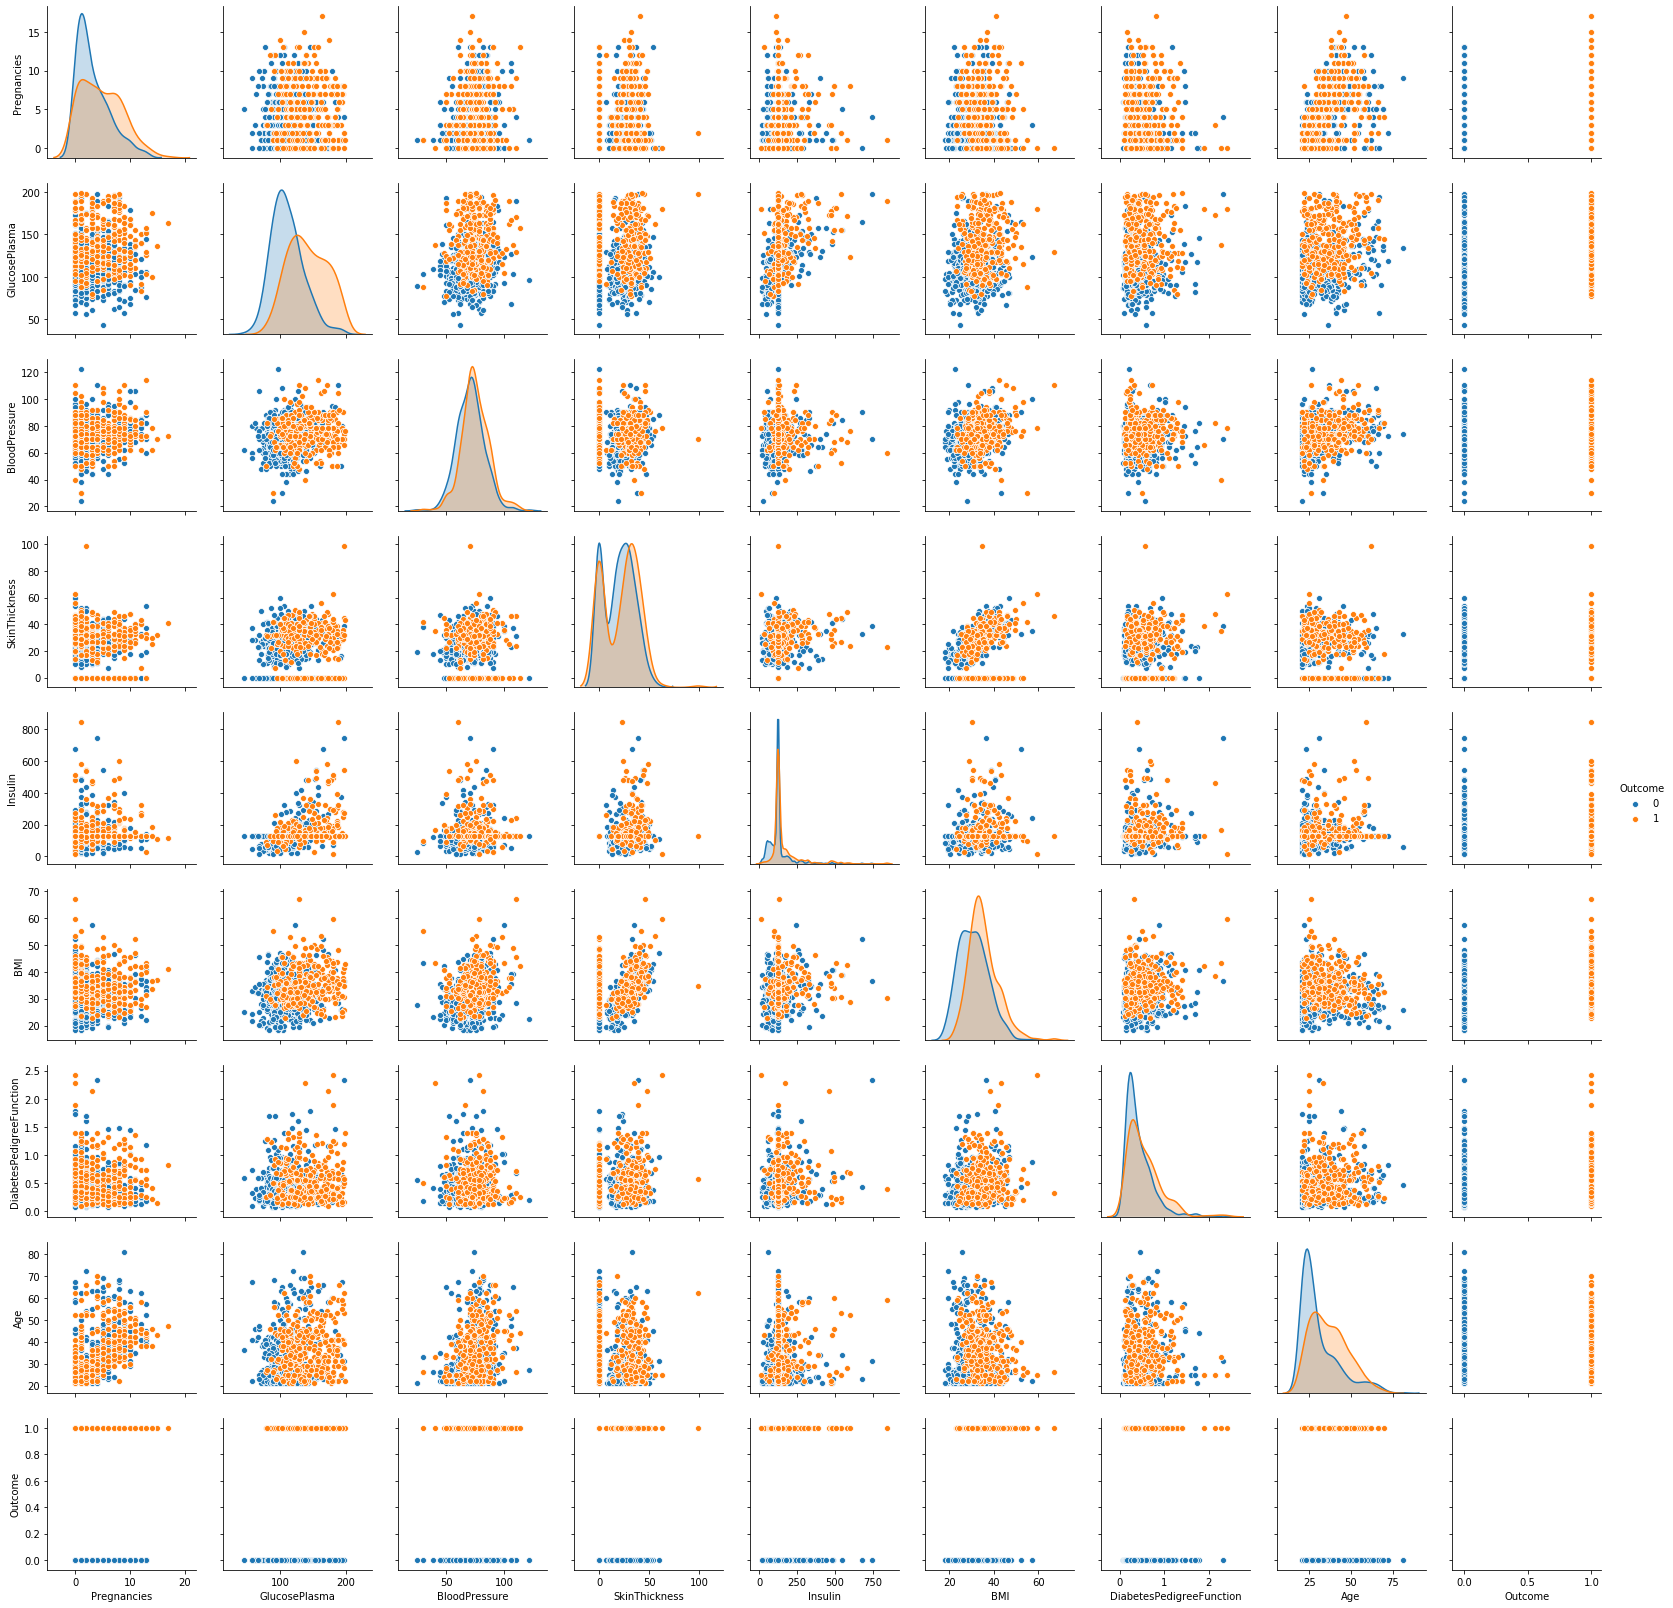

In [14]:
sns.pairplot(pima, hue='Outcome')

## Interpretation and finds from the Pairplot.

- Whenever we have a classification business case, the most important is to look at the plots that are there in the diagonal axis of the pairplot.
- GlucosePlasma, BMI and Age has some variance in the data between the records representing Diabetic and Non-Diabetic.
- BllodPressure, SkinThickness and Insulin has the records representing Diabetic and Non-Diabetic overlapping each other and hence these feature are of no importance when detecting diabeties.
- Higher number of pregency with Older age should that there is a indication of diabeties among the pima tribe.
- Age feature also incdicaties that as the age is increasing there is a higher degree that a pima tribe women may be diagonised with diabeties.
- When checking on other plots other than the plots on diagonal axis, we see that the data points are scattered all around, over lapping, hence there is no clear decision boundary there.
- There are no columns that has a linear association.

In [15]:
pima.corr()

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,-0.081672,0.025047,0.021559,-0.033523,0.544341,0.221898
GlucosePlasma,0.128213,1.000000,0.218937,0.074455,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.007937,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,-0.081672,0.074455,0.007937,1.000000,0.183368,0.381109,0.183928,-0.113970,0.074752
Insulin,0.025047,0.419451,0.045363,0.183368,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.381109,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.183928,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,-0.113970,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.074752,0.203790,0.312038,0.173844,0.238356,1.000000


### Interpretation based on Correlation Matrix:
- There is no great correlation to the outcome class except for the BMI feature with has slightly high corelation compared to other features.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
X = pima.iloc[:,0:7]
Y = pima.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [18]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=1)
dt_model.fit(X_train, y_train)
print("Training Accuracy {}".format(dt_model.score(X_train , y_train)))

Training Accuracy 0.813780260707635


# Q10 Print the accuracy of the model & print the confusion matrix 

In [19]:
print("Testing Accuracy {}".format(dt_model.score(X_test , y_test)))

Testing Accuracy 0.7532467532467533


In [20]:
y_predict = dt_model.predict(X_test)

In [21]:
print(metrics.confusion_matrix(y_test, y_predict))

[[138   8]
 [ 49  36]]


In [22]:
print("Recall {}".format(36/(36+49)))

Recall 0.4235294117647059


In [23]:
print("Precision {}".format(36/(36+8)))

Precision 0.8181818181818182


Print the feature importance of the decision model - Optional

In [24]:
dt_model.feature_importances_

array([0.09592902, 0.38858033, 0.03940158, 0.02786154, 0.07396371,
       0.26196699, 0.11229683])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
ranforClass = RandomForestClassifier(n_estimators = 39)
ranforClass = ranforClass.fit(X_train, y_train)
print("Training Accuracy {}".format(ranforClass.score(X_train , y_train)))

Training Accuracy 0.9981378026070763


In [46]:
y_predict = ranforClass.predict(X_test)
print("Testing Accuracy {}".format(ranforClass.score(X_test , y_test)))
print(metrics.confusion_matrix(y_test, y_predict))

Testing Accuracy 0.7619047619047619
[[126  20]
 [ 35  50]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [40]:
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators=30, learning_rate=1.0, random_state=1)
adaclass = adaclass.fit(X_train, y_train)
print("Training Accuracy {}".format(adaclass.score(X_train , y_train)))

Training Accuracy 0.8044692737430168


In [41]:
y_predict = adaclass.predict(X_test)
print("Testing Accuracy {}".format(adaclass.score(X_test , y_test)))
print(metrics.confusion_matrix(y_test,y_predict))

Testing Accuracy 0.7922077922077922
[[127  19]
 [ 29  56]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [29]:
from sklearn.ensemble import BaggingClassifier
bagClass = BaggingClassifier(n_estimators=20, random_state=1)
bagClass = bagClass.fit(X_train, y_train)
print("Training Accuracy {}".format(bagClass.score(X_train , y_train)))

Training Accuracy 0.9906890130353817


In [30]:
y_predict = bagClass.predict(X_test)
print("Testing Accuracy {}".format(bagClass.score(X_test , y_test)))
print(metrics.confusion_matrix(y_test,y_predict))

Testing Accuracy 0.7619047619047619
[[129  17]
 [ 38  47]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
grabooclass = GradientBoostingClassifier(n_estimators=65)
grabooclass = grabooclass.fit(X_train, y_train)
print("Training Accuracy {}".format(grabooclass.score(X_train, y_train)))

Training Accuracy 0.8789571694599627


In [32]:
y_predict = grabooclass.predict(X_test)
print("Testing Accuracy {}".format(grabooclass.score(X_test, y_test)))
print(metrics.confusion_matrix(y_test,y_predict))

Testing Accuracy 0.7965367965367965
[[129  17]
 [ 30  55]]


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy Score {}".format(acc))

Accuracy Score 0.7965367965367965


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [35]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2 = AdaBoostClassifier(n_estimators=30, learning_rate=1.0, random_state=1)
clf3 = BaggingClassifier(n_estimators=20, random_state=1)
clf4 = GradientBoostingClassifier(n_estimators=65)
eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('adb', clf2), ('bag', clf3),('grd', clf4)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
print("Training Accuracy {}".format(eclf1.score(X_train, y_train)))

Training Accuracy 0.9199255121042831


In [36]:
y_predict = eclf1.predict(X_test)
print("Testing Accuracy {}".format(eclf1.score(X_test, y_test)))
print(metrics.confusion_matrix(y_test,y_predict))

Testing Accuracy 0.7835497835497836
[[134  12]
 [ 38  47]]
